<a href="https://colab.research.google.com/github/egipot/freeCodeCamp_tensorFlow/blob/main/freeCodeCamp_TensorFlow_3_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import and load the data

In [3]:
#https://www.freecodecamp.org/learn/machine-learning-with-python/tensorflow/core-learning-algorithms-working-with-data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

#Load the data set
#https://www.tensorflow.org/tutorials/load_data/csv
#https://storage.googleapis.com/tf-datasets/titanic/train.csv
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
#training data ("Parch means parents+children. if it were 2 parents and 3 children, and the person in question was one of the parents, their parch value would only be 3, not 5.  One "parent" is themselves, and the other is listed in n_siblings_spouse column.  If the value was for one of the children in the same family their parch value would be 2.. if it were 2 parents and 3 children, and the person in question was one of the parents, their parch value would only be 3, not 5.  One "parent" is themselves, and the other is listed in n_siblings_spouse column.  If the value was for one of the children in the same family their parch value would be 2.")

#https://storage.googleapis.com/tf-datasets/titanic/eval.csv
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
#testing data

y_train = dftrain.pop ('survived')
y_eval = dfeval.pop ('survived')
#pop removes the column  https://www.geeksforgeeks.org/python-pandas-dataframe-pop/



# 2. Explore the data sets

In [4]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
# <dataframe>.head() By default, shows the first five rows or entries in a data frame.
# or

In [5]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [6]:
#print a specific data
#.loc[<row number>]
dftrain.loc[0], y_train.loc[0]

(sex                          male
 age                          22.0
 n_siblings_spouses              1
 parch                           0
 fare                         7.25
 class                       Third
 deck                      unknown
 embark_town           Southampton
 alone                           n
 Name: 0, dtype: object,
 0)

In [7]:
#print a specific data
#dataframe["<name of the column">]
dftrain["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64

In [9]:
#describe over-all info
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [10]:
#get info
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [12]:
#get shape (rows, columns)
dftrain.shape


(627, 9)

In [13]:
# survival information
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

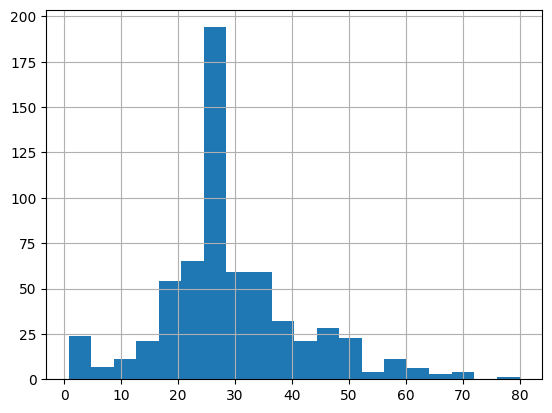

In [14]:
# Visuals are always valuable so let's generate a few graphs of the data:

dftrain.age.hist (bins = 20)

^Majority of passengers are in their 20's

<Axes: >

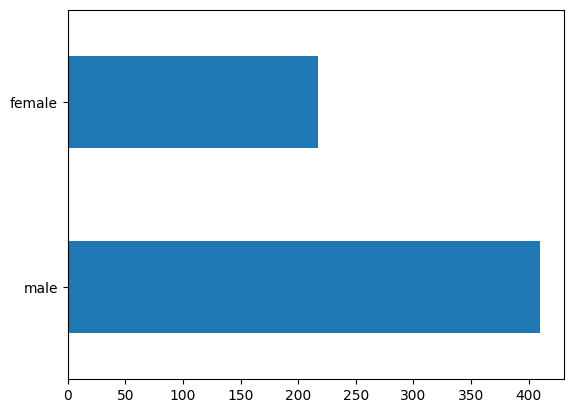

In [15]:
# <dataframe name>.<column name>.<function>
#barh = bar horizontal

dftrain.sex.value_counts().plot(kind = 'barh')

^Majority of passengers are male



---


**def value_counts**(normalize: bool=False, sort: bool=True, ascending: bool=False, bins=None, dropna: bool=True) -> Series
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

Parameters
normalize : bool, default False
    If True then the object returned will contain the relative frequencies of the unique values.
sort : bool, default True
    Sort by frequencies.
ascending : bool, default False
    Sort in ascending order.
bins : int, optional
    Rather than count values, group them into half-open bins, a convenience for pd.cut, only works with numeric data.
dropna : bool, default True
    Don't include counts of NaN.

Returns
Series

See Also
Series.count: Number of non-NA elements in a Series.
DataFrame.count: Number of non-NA elements in a DataFrame.
DataFrame.value_counts: Equivalent method on DataFrames.

Examples
>>> index = pd.Index([3, 1, 2, 3, 4, np.nan])
>>> index.value_counts()
3.0    2
1.0    1
2.0    1
4.0    1
dtype: int64
With normalize set to True, returns the relative frequency by dividing all values by the sum of values.

>>> s = pd.Series([3, 1, 2, 3, 4, np.nan])
>>> s.value_counts(normalize=True)
3.0    0.4
1.0    0.2
2.0    0.2
4.0    0.2
dtype: float64
**bins**

Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.

>>> s.value_counts(bins=3)
(0.996, 2.0]    2
(2.0, 3.0]      2
(3.0, 4.0]      1
dtype: int64
**dropna**

With dropna set to False we can also see NaN index values.

>>> s.value_counts(dropna=False)
3.0    2
1.0    1
2.0    1
4.0    1
NaN    1
dtype: int64


---



<Axes: >

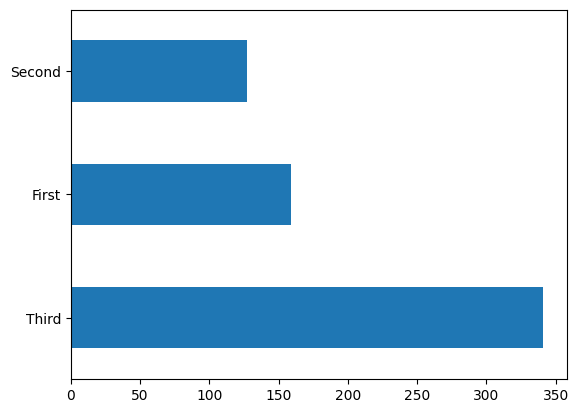

In [17]:
dftrain['class'].value_counts().plot(kind='barh')

^Majority of the passengers are in "third" class

Text(0.5, 0, '% survive')

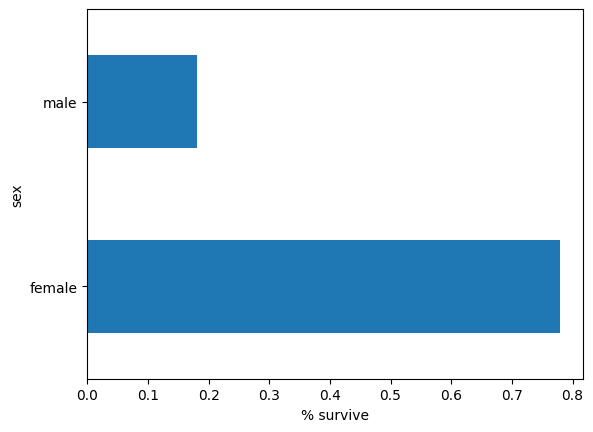

In [16]:
pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

^ Females have a much higher chance of survival



---


**def concat**(objs: Iterable[NDFrame] | Mapping[HashableT, NDFrame], axis: Axis=0, join: str='outer', ignore_index: bool=False, keys=None, levels=None, names=None, verify_integrity: bool=False, sort: bool=False, copy: bool=True) -> DataFrame | Series
Concatenate pandas objects along a particular axis.

Allows optional set logic along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis, which may be useful if the labels are the same (or overlapping) on the passed axis number.

Parameters
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the keys argument, unless it is passed, in which case the values will be selected (see below). Any None objects will be dropped silently unless they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, default 0
    The axis to concatenate along.
join : {'inner', 'outer'}, default 'outer'
    How to handle indexes on other axis (or axes).
ignore_index : bool, default False
    If True, do not use the index values along the concatenation axis. The resulting axis will be labeled 0, ..., n - 1. This is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information. Note the index values on the other axes are still respected in the join.
keys : sequence, default None
    If multiple levels passed, should contain tuples. Construct hierarchical index using the passed keys as the outermost level.
levels : list of sequences, default None
    Specific levels (unique values) to use for constructing a MultiIndex. Otherwise they will be inferred from the keys.
names : list, default None
    Names for the levels in the resulting hierarchical index.
verify_integrity : bool, default False
    Check whether the new concatenated axis contains duplicates. This can be very expensive relative to the actual data concatenation.
sort : bool, default False
    Sort non-concatenation axis if it is not already aligned when join is 'outer'. This has no effect when join='inner', which already preserves the order of the non-concatenation axis.

copy : bool, default True
    If False, do not copy data unnecessarily.

Returns
object, type of objs
    When concatenating all Series along the index (axis=0), a Series is returned. When objs contains at least one DataFrame, a DataFrame is returned. When concatenating along the columns (axis=1), a DataFrame is returned.

See Also
DataFrame.join : Join DataFrames using indexes.
DataFrame.merge : Merge DataFrames by indexes or columns.

Notes
The keys, levels, and names arguments are all optional.

A walkthrough of how this method fits in with other tools for combining pandas objects can be found here <https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html>__.

It is not recommended to build DataFrames by adding single rows in a for loop. Build a list of rows and make a DataFrame in a single concat.

Examples
Combine two Series.

>>> s1 = pd.Series(['a', 'b'])
>>> s2 = pd.Series(['c', 'd'])
>>> pd.concat([s1, s2])
0    a
1    b
0    c
1    d
dtype: object
Clear the existing index and reset it in the result by setting the ignore_index option to True.

>>> pd.concat([s1, s2], ignore_index=True)
0    a
1    b
2    c
3    d
dtype: object
Add a hierarchical index at the outermost level of the data with the keys option.

>>> pd.concat([s1, s2], keys=['s1', 's2'])
s1  0    a
    1    b
s2  0    c
    1    d
dtype: object
Label the index keys you create with the names option.

>>> pd.concat([s1, s2], keys=['s1', 's2'],
...           names=['Series name', 'Row ID'])
Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object
Combine two DataFrame objects with identical columns.

>>> df1 = pd.DataFrame([['a', 1], ['b', 2]],
...                    columns=['letter', 'number'])
>>> df1
  letter  number
0      a       1
1      b       2
>>> df2 = pd.DataFrame([['c', 3], ['d', 4]],
...                    columns=['letter', 'number'])
>>> df2
  letter  number
0      c       3
1      d       4
>>> pd.concat([df1, df2])
  letter  number
0      a       1
1      b       2
0      c       3
1      d       4
Combine DataFrame objects with overlapping columns and return everything. Columns outside the intersection will be filled with NaN values.

>>> df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
...                    columns=['letter', 'number', 'animal'])
>>> df3
  letter  number animal
0      c       3    cat
1      d       4    dog
>>> pd.concat([df1, df3], sort=False)
  letter  number animal
0      a       1    NaN
1      b       2    NaN
0      c       3    cat
1      d       4    dog
Combine DataFrame objects with overlapping columns and return only those that are shared by passing inner to the join keyword argument.

>>> pd.concat([df1, df3], join="inner")
  letter  number
0      a       1
1      b       2
0      c       3
1      d       4
Combine DataFrame objects horizontally along the x axis by passing in axis=1.

>>> df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
...                    columns=['animal', 'name'])
>>> pd.concat([df1, df4], axis=1)
  letter  number  animal    name
0      a       1    bird   polly
1      b       2  monkey  george
Prevent the result from including duplicate index values with the verify_integrity option.

>>> df5 = pd.DataFrame([1], index=['a'])
>>> df5
   0
a  1
>>> df6 = pd.DataFrame([2], index=['a'])
>>> df6
   0
a  2
>>> pd.concat([df5, df6], verify_integrity=True)
Traceback (most recent call last):
    ...
ValueError: Indexes have overlapping values: ['a']
Append a single row to the end of a DataFrame object.

>>> df7 = pd.DataFrame({'a': 1, 'b': 2}, index=[0])
>>> df7
    a   b
0   1   2
>>> new_row = pd.Series({'a': 3, 'b': 4})
>>> new_row
a    3
b    4
dtype: int64
>>> pd.concat([df7, new_row.to_frame().T], ignore_index=True)
    a   b
0   1   2
1   3   4



---



In [18]:
dfeval.shape

(264, 9)

# 3. Create categorical columns and numeric columns

Categorical data is any data that is not numeric (e.g. string)

In [26]:
#Transform the categorical columns into numerical representation,
#e.g. column "sex" having values = ['male', 'female'] can be represented as [0, 1]
#e.g. column "class" having values = ['first', 'second', 'third'] can be represented as [0, 1, 2]

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class','deck','embark_town','alone']

NUMERIC_COLUMNS = ['age', 'fare']

# 4. Create feature columns for the linear estimator

In [27]:
#to be fed into the linear estimator or linear model to make predictions
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()    #gets a lost of all the unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [30]:
dftrain['sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
dftrain[feature_name].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.4583,  21.075 ,
        11.1333,  30.0708,  16.7   ,   8.05  ,  31.275 ,   7.8542,
        29.125 ,  13.    ,  18.    ,   7.225 ,  26.    ,  35.5   ,
        31.3875, 263.    ,   7.8792,   7.8958,  27.7208, 146.5208,
         7.75  ,  10.5   ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,  76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,  23.    ,
        77.2875,   8.6542,   7.775 ,  24.15  ,  14.4542,  14.4583,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  12.525 ,
         7.3125,  61.3792,   7.7333,  69.55  ,  16.1   ,  55.    ,
        25.4667,  28.7125,   0.    ,  15.05  ,  22.025 ,  26.5

In [28]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin



---

**def categorical_column_with_vocabulary_list**(key, vocabulary_list, dtype=None, default_value=-1, num_oov_buckets=0)
A CategoricalColumn with in-memory vocabulary. (deprecated)

Deprecated: THIS FUNCTION IS DEPRECATED. It will be removed in a future version. Instructions for updating: Use Keras preprocessing layers instead, either directly or via the tf.keras.utils.FeatureSpace utility. Each of tf.feature_column.* has a functional equivalent in tf.keras.layers for feature preprocessing when training a Keras model.

Use this when your inputs are in string or integer format, and you have an in-memory vocabulary mapping each value to an integer ID. By default, out-of-vocabulary values are ignored. Use either (but not both) of num_oov_buckets and default_value to specify how to include out-of-vocabulary values.

For input dictionary features, features[key] is either Tensor or SparseTensor. If Tensor, missing values can be represented by -1 for int and '' for string, which will be dropped by this feature column.

Example with num_oov_buckets: In the following example, each input in vocabulary_list is assigned an ID 0-3 corresponding to its index (e.g., input 'B' produces output 2). All other inputs are hashed and assigned an ID 4-5.

colors = categorical_column_with_vocabulary_list(
    key='colors', vocabulary_list=('R', 'G', 'B', 'Y'),
    num_oov_buckets=2)
columns = [colors, ...]
features = tf.io.parse_example(..., features=make_parse_example_spec(columns))
linear_prediction, _, _ = linear_model(features, columns)
Example with default_value: In the following example, each input in vocabulary_list is assigned an ID 0-4 corresponding to its index (e.g., input 'B' produces output 3). All other inputs are assigned default_value 0.

colors = categorical_column_with_vocabulary_list(
    key='colors', vocabulary_list=('X', 'R', 'G', 'B', 'Y'), default_value=0)
columns = [colors, ...]
features = tf.io.parse_example(..., features=make_parse_example_spec(columns))
linear_prediction, _, _ = linear_model(features, columns)
And to make an embedding with either:

columns = [embedding_column(colors, 3),...]
features = tf.io.parse_example(..., features=make_parse_example_spec(columns))
dense_tensor = input_layer(features, columns)
Args:
  key: A unique string identifying the input feature. It is used as the column
    name and the dictionary key for feature parsing configs, feature Tensor objects, and feature columns.
  vocabulary_list: An ordered iterable defining the vocabulary. Each feature
    is mapped to the index of its value (if present) in vocabulary_list. Must be castable to dtype.
  dtype: The type of features. Only string and integer types are supported. If
    None, it will be inferred from vocabulary_list.
  default_value: The integer ID value to return for out-of-vocabulary feature
    values, defaults to -1. This can not be specified with a positive num_oov_buckets.
  num_oov_buckets: Non-negative integer, the number of out-of-vocabulary
    buckets. All out-of-vocabulary inputs will be assigned IDs in the range [len(vocabulary_list), len(vocabulary_list)+num_oov_buckets) based on a hash of the input value. A positive num_oov_buckets can not be specified with default_value.

Returns:
  A CategoricalColumn with in-memory vocabulary.

Raises:
  ValueError: if vocabulary_list is empty, or contains duplicate keys.
  ValueError: num_oov_buckets is a negative integer.
  ValueError: num_oov_buckets and default_value are both specified.
  ValueError: if dtype is not integer or string.

---



# Training Process

Feed information into the data sets
If the data set is large, load them in **batches**
Give 32 entries at once


An** epoch** is one stream of our entire data set. How many times the model is going to see the same data (but in a different order) and pick up on pattens.. The more data is fed, the more precise prediction

Start with a lower amount of epochs and eventually increase (**batch size**)

**Input function**




# 5. Make Input function

https://www.tensorflow.org/tutorials/estimator/linear

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [31]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function(): #inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) #create tf.data.Dataset object with data and its labels
    if shuffle:
      ds = ds.shuffle(1000) #randomize the order of data
    ds = ds.batch(batch_size).repeat(num_epochs) #split dataset into batches of 32 and repeat the process for number of epochs
    return ds #return a batch of the dataset
  return input_function #return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  #call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

# 6. Create the model

In this case, use a linear estimator to utilize the linear regression algorithm


In [32]:
#Create a linear estimator by passing the feature columns we created earlier
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.




---
def __init__(feature_columns, model_dir=None, n_classes=2, weight_column=None, label_vocabulary=None, optimizer='Ftrl', config=None, warm_start_from=None, loss_reduction=tf.losses.Reduction.SUM_OVER_BATCH_SIZE, sparse_combiner='sum')
Linear classifier model. (deprecated)

Deprecated: THIS FUNCTION IS DEPRECATED. It will be removed in a future version. Instructions for updating: Use tf.keras instead.

Train a linear model to classify instances into one of multiple possible classes. When number of possible classes is 2, this is binary classification.

Example:

categorical_column_a = categorical_column_with_hash_bucket(...)
categorical_column_b = categorical_column_with_hash_bucket(...)

categorical_feature_a_x_categorical_feature_b = crossed_column(...)

# Estimator using the default optimizer.
estimator = tf.estimator.LinearClassifier(
    feature_columns=[categorical_column_a,
                     categorical_feature_a_x_categorical_feature_b])

# Or estimator using the FTRL optimizer with regularization.
estimator = tf.estimator.LinearClassifier(
    feature_columns=[categorical_column_a,
                     categorical_feature_a_x_categorical_feature_b],
    optimizer=tf.keras.optimizers.Ftrl(
      learning_rate=0.1,
      l1_regularization_strength=0.001
    ))

# Or estimator using an optimizer with a learning rate decay.
estimator = tf.estimator.LinearClassifier(
    feature_columns=[categorical_column_a,
                     categorical_feature_a_x_categorical_feature_b],
    optimizer=lambda: tf.keras.optimizers.Ftrl(
        learning_rate=tf.exponential_decay(
            learning_rate=0.1,
            global_step=tf.get_global_step(),
            decay_steps=10000,
            decay_rate=0.96))

# Or estimator with warm-starting from a previous checkpoint.
estimator = tf.estimator.LinearClassifier(
    feature_columns=[categorical_column_a,
                     categorical_feature_a_x_categorical_feature_b],
    warm_start_from="/path/to/checkpoint/dir")

# Input builders
def input_fn_train:
  # Returns tf.data.Dataset of (x, y) tuple where y represents label's class
  # index.
  pass
def input_fn_eval:
  # Returns tf.data.Dataset of (x, y) tuple where y represents label's class
  # index.
  pass
def input_fn_predict:
  # Returns tf.data.Dataset of (x, None) tuple.
  pass
estimator.train(input_fn=input_fn_train)
metrics = estimator.evaluate(input_fn=input_fn_eval)
predictions = estimator.predict(input_fn=input_fn_predict)
Input of train and evaluate should have following features,
  otherwise there will be a KeyError:

if weight_column is not None, a feature with key=weight_column whose value is a Tensor.
for each column in feature_columns:
if column is a SparseColumn, a feature with key=column.name whose value is a SparseTensor.
if column is a WeightedSparseColumn, two features: the first with key the id column name, the second with key the weight column name. Both features' value must be a SparseTensor.
if column is a RealValuedColumn, a feature with key=column.name whose value is a Tensor.
Loss is calculated by using softmax cross entropy.

@compatibility(eager) Estimators can be used while eager execution is enabled. Note that input_fn and all hooks are executed inside a graph context, so they have to be written to be compatible with graph mode. Note that input_fn code using tf.data generally works in both graph and eager modes.

@end_compatibility


---






7. Train the model



In [33]:
#train
linear_est.train(train_input_fn)

#get model metrics/ stats by testing on the data
result = linear_est.evaluate(eval_input_fn)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.




---

**def evaluate**(input_fn, steps=None, hooks=None, checkpoint_path=None, name=None)
Evaluates the model given evaluation data input_fn.

For each step, calls input_fn, which returns one batch of data. Evaluates until:

steps batches are processed, or
input_fn raises an end-of-input exception (tf.errors.OutOfRangeError or StopIteration).
Args:
  input_fn: A function that constructs the input data for evaluation. See
    [Premade Estimators](
    https://tensorflow.org/guide/premade\_estimators#create\_input\_functions) for more information. The function should construct and return one of the following:

A tf.data.Dataset object: Outputs of Dataset object must be a tuple (features, labels) with same constraints as below.
A tuple (features, labels): Where features is a tf.Tensor or a dictionary of string feature name to Tensor and labels is a Tensor or a dictionary of string label name to Tensor. Both features and labels are consumed by model_fn. They should satisfy the expectation of model_fn from inputs. steps: Number of steps for which to evaluate model. If None, evaluates until input_fn raises an end-of-input exception. hooks: List of tf.train.SessionRunHook subclass instances. Used for callbacks inside the evaluation call. checkpoint_path: Path of a specific checkpoint to evaluate. If None, the latest checkpoint in model_dir is used. If there are no checkpoints in model_dir, evaluation is run with newly initialized Variables instead of ones restored from checkpoint. name: Name of the evaluation if user needs to run multiple evaluations on different data sets, such as on training data vs test data. Metrics for different evaluations are saved in separate folders, and appear separately in tensorboard.
Returns:
  A dict containing the evaluation metrics specified in model_fn keyed by name, as well as an entry global_step which contains the value of the global step for which this evaluation was performed. For canned estimators, the dict contains the loss (mean loss per mini-batch) and the average_loss (mean loss per sample). Canned classifiers also return the accuracy. Canned regressors also return the label/mean and the prediction/mean.

Raises:
  ValueError: If steps <= 0.


---



In [34]:
#clear_output() #clears console output

#the result variable is simply a dict of stats about our model
result['accuracy']

0.75

^not very good...can be improved later  (play with the epoch #)

In [35]:
#print the result

result

{'accuracy': 0.75,
 'accuracy_baseline': 0.625,
 'auc': 0.825528,
 'auc_precision_recall': 0.7917815,
 'average_loss': 0.52798057,
 'label/mean': 0.375,
 'loss': 0.52403045,
 'precision': 0.6386555,
 'prediction/mean': 0.48991793,
 'recall': 0.7676768,
 'global_step': 200}

In [36]:
#how to get predictions from the model and see what those actual predictions are, use dot predict

result = list(linear_est.predict(eval_input_fn))
result

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


[{'logits': array([-1.7687453], dtype=float32),
  'logistic': array([0.14569843], dtype=float32),
  'probabilities': array([0.8543015 , 0.14569843], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.76041055], dtype=float32),
  'logistic': array([0.68144286], dtype=float32),
  'probabilities': array([0.31855714, 0.68144286], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([2.2580366], dtype=float32),
  'logistic': array([0.9053415], dtype=float32),
  'probabilities': array([0.09465849, 0.9053415 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},


^ the result is a dictionary that represents the predictions for every single prediction

In [37]:
#check one (one dictionary of one prediction)
result[0]

{'logits': array([-1.7687453], dtype=float32),
 'logistic': array([0.14569843], dtype=float32),
 'probabilities': array([0.8543015 , 0.14569843], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [38]:
result[0]["probabilities"]

array([0.8543015 , 0.14569843], dtype=float32)

In [40]:
result[0]["probabilities"][1] #survival

0.14569843

In [43]:
print(dfeval.loc[0])
print(result[0]["probabilities"][1]) #survival

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0.14569843


In [44]:
print(dfeval.loc[2])
print(result[2]["probabilities"][1]) #survival

sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
0.9053415


In [45]:
print(dfeval.loc[3])
print(result[3]["probabilities"][1]) #survival

sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
0.8366307


In [49]:
print(dfeval.loc[3])
print(f'prediction: {result[3]["probabilities"][1]}') #survival

# compare if this one prediction is same to what actually happened (if the person survived or not)
print(f'actual survival: {y_eval.loc[3]}')

sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
prediction: 0.8366307020187378
actual survival: 1


In [50]:
print(dfeval.loc[4])
print(f'prediction: {result[4]["probabilities"][1]}') #survival

# compare if this one prediction is same to what actually happened (if the person survived or not)
print(f'actual survival: {y_eval.loc[4]}')

sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
prediction: 0.41560888290405273
actual survival: 1


^ prediction is not agreeing to what actually happened --> note that accuracy is LOW :(